In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets


In [158]:
boston= datasets.load_boston()
bos=pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target

In [159]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


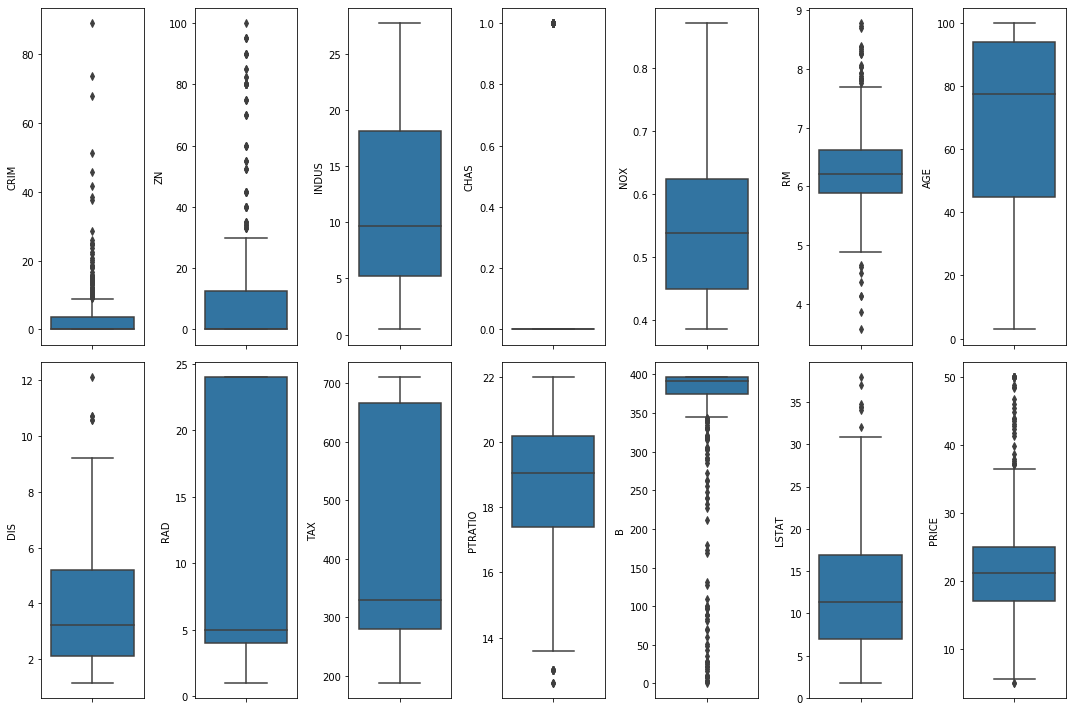

In [160]:
fig, ax= plt.subplots(nrows = 2, ncols = 7, figsize= (15,10))
index= 0
ax = ax.flatten()

for col, val in bos.items():
    sns.boxplot(y=col, data=bos, ax= ax[index])
    index +=1
plt.tight_layout()



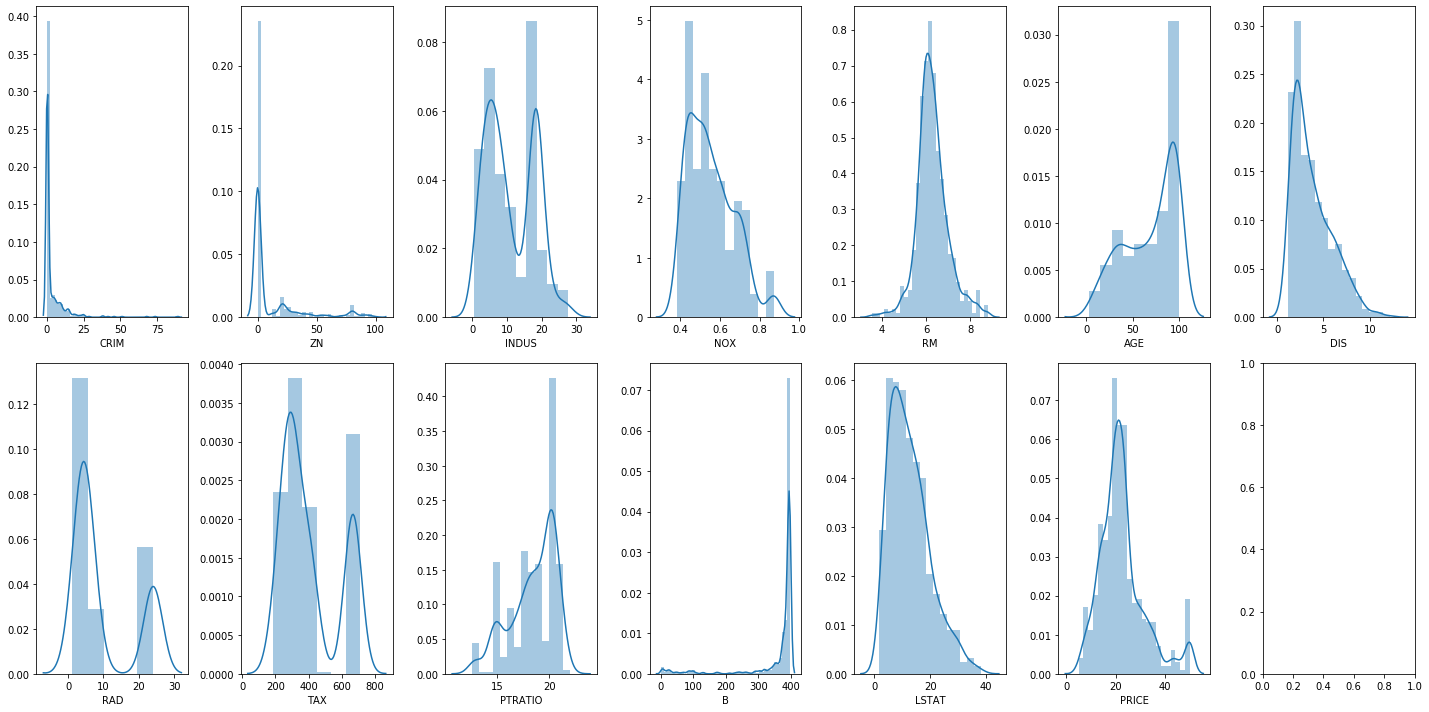

In [161]:
bos1 = bos.drop(['CHAS'], axis= 1)

# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in bos1.items():
    sns.distplot(bos1[col], ax=ax[index])
    index += 1
plt.tight_layout()

In [162]:
x= bos.drop(['PRICE'], axis=1)
y= bos['PRICE']

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [164]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)


In [165]:
regressor= regressor.fit(x_train,y_train)

In [167]:
regressor.score(x_train,y_train)

0.9689693707487042

In [168]:
regressor.score(x_test,y_test)

0.8768429479592685

In [169]:
predicted= regressor.predict(x_test)

In [170]:
grid_param = {
    "n_estimators" : [90,100,115],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [171]:
grid_search = GridSearchCV(estimator=regressor,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [172]:
regressor= grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.4min finished


In [174]:
grid_search.best_params_

{'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 115}

In [239]:
regressor = RandomForestRegressor(max_features= 'log2',min_samples_leaf= 1, min_samples_split= 4, n_estimators= 115)


In [240]:
regressor= regressor.fit(x_train,y_train)

In [241]:
regressor.score(x_train,y_train)

0.9700131095165191

In [242]:
regressor.score(x_test,y_test)

0.8589207144002956